First I will load in my training and test datasets

In [2]:
import pandas as pd

training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"

#details for wildfire dataset
independent_cols = [ "year", "temp", "humidity", "rainfall", "drought_code", "buildup_index",  "day", "month", "wind_speed"]
dependent_col = ["fire"]

# Load in the training dataset
training_data = pd.read_csv(training_file, usecols=independent_cols + dependent_col)
print(training_data.head())
print(training_data.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)


In [3]:
# set up a matrix X containing the independent variables from the training dataset
X_train = training_data.loc[:,independent_cols]
print(X_train.head())
print(X_train.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
(154, 9)


In [4]:
# set up a vector y containing the dependent variable from the training dataset
y_train = training_data.loc[:, dependent_col]
print(y_train.head())
print(y_train.shape)

  fire
0   no
1   no
2   no
3   no
4   no
(154, 1)


In [5]:
# load test data
test_data = pd.read_csv(test_file)
print(test_data.head())
print(test_data.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31        72       0.3         30.47           5.63    7   

   month  wind_speed  
0      6          16  
1      6          18  
2      9          19  
3      9          28  
4      9          17  
(50, 10)


In [6]:
# set up a matrix X containing the independent variables from the test dataset
X_test = test_data.loc[:, independent_cols]
print(X_test.head())
print(X_test.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
(50, 9)


In [7]:
# set up a vector y containing the dependent variable from the test dataset
y_test = test_data.loc[:, dependent_col]
print(y_test.head())
print(y_test.shape)

  fire
0   no
1  yes
2   no
3   no
4   no
(50, 1)


Now I'll build the model with the default values for the hyperparameters for SVM

In [17]:
from sklearn.svm import SVC
from sklearn import metrics

# create a model with default hyperparameters for SVM C=1.0 kernel=rbf gamma=scale
model = SVC()
model.fit(X_train, y_train.values.ravel())

# make predictions on training and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# evaluate the model's performance
print("Training Accuracy:", metrics.accuracy_score(y_train, pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, pred_test))

Training Accuracy: 0.512987012987013
Test Accuracy: 0.56


Now I will explore using different values of C and plot results

In [20]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_train = []
accuracy_test = []

for c in c_values:
    try:
        model = SVC(C=c)
        model.fit(X_train, y_train.values.ravel())
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        accuracy_train.append(metrics.accuracy_score(y_train, pred_train))
        accuracy_test.append(metrics.accuracy_score(y_test, pred_test))
        print(f"C: {c} => Training accuracy: {accuracy_train[-1]:.4f}, Test accuracy: {accuracy_test[-1]:.4f}")
    except Exception as e:
        print(f"C: {c} => Error: {e}")

C: 0.001 => Training accuracy: 0.5130, Test accuracy: 0.5600
C: 0.01 => Training accuracy: 0.5130, Test accuracy: 0.5600
C: 0.1 => Training accuracy: 0.5130, Test accuracy: 0.5600
C: 1 => Training accuracy: 0.5130, Test accuracy: 0.5600
C: 10 => Training accuracy: 0.7078, Test accuracy: 0.6200
C: 100 => Training accuracy: 0.8701, Test accuracy: 0.7800
C: 1000 => Training accuracy: 0.8766, Test accuracy: 0.8000


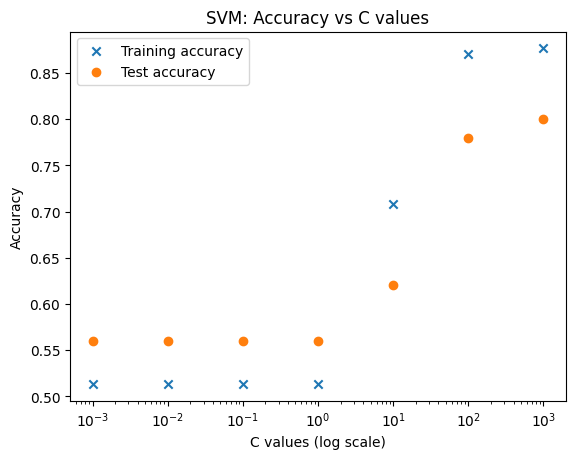

In [22]:
# let plot the accuracy on training and test datasets against the C values
import matplotlib.pyplot as plt
plt.scatter(c_values, accuracy_train, label="Training accuracy", marker='x')
plt.scatter(c_values, accuracy_test, label="Test accuracy", marker='o')
plt.xscale('log')
plt.xlabel('C values (log scale)')
plt.ylabel('Accuracy')
plt.title('SVM: Accuracy vs C values')
plt.legend()
plt.show()

Now I will compare different values for kernel and check results

In [24]:
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_train_kernel = []
accuracy_test_kernel = []

for kernel in kernel_options:
    try:
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train.values.ravel())
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        accuracy_train_kernel.append(metrics.accuracy_score(y_train, pred_train))
        accuracy_test_kernel.append(metrics.accuracy_score(y_test, pred_test))
        print(f"Kernel: {kernel} => Training accuracy: {accuracy_train_kernel[-1]:.4f}, Test accuracy: {accuracy_test_kernel[-1]:.4f}")
    except Exception as e:
        print(f"Kernel: {kernel} => Error: {e}")

Kernel: linear => Training accuracy: 0.9156, Test accuracy: 0.8800
Kernel: poly => Training accuracy: 0.5130, Test accuracy: 0.5600
Kernel: rbf => Training accuracy: 0.5130, Test accuracy: 0.5600
Kernel: sigmoid => Training accuracy: 0.5130, Test accuracy: 0.5600


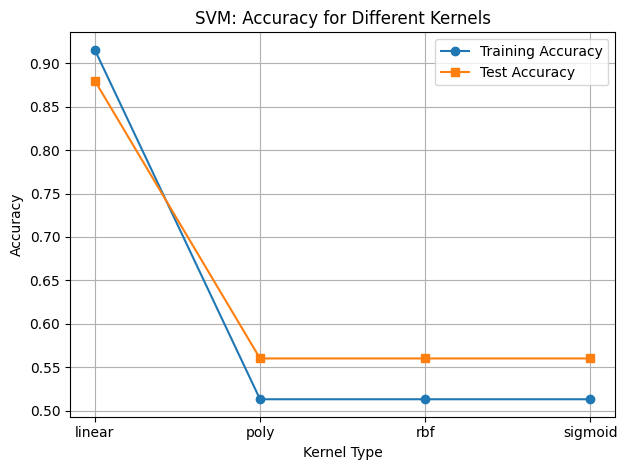

In [27]:
#plot accuracy for different kernels
plt.plot(kernel_options, accuracy_train_kernel, marker='o', label='Training Accuracy')
plt.plot(kernel_options, accuracy_test_kernel, marker='s', label='Test Accuracy')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM: Accuracy for Different Kernels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now I will tune both hyperparameters together and see what results this brings

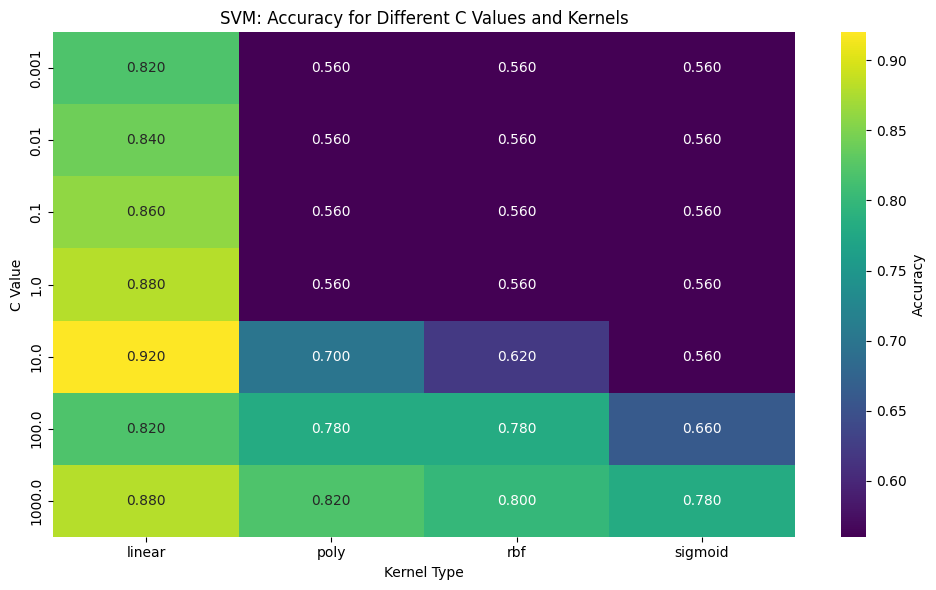

In [40]:
import seaborn as sns

results = []

for c in c_values:
    for kernel in kernel_options:
        try:
            model = SVC(C=c, kernel=kernel)
            model.fit(X_train, y_train.values.ravel())
            pred_train = model.predict(X_train)
            pred_test = model.predict(X_test)
            train_acc = metrics.accuracy_score(y_train, pred_train)
            test_acc = metrics.accuracy_score(y_test, pred_test)
            results.append((c, kernel, train_acc, test_acc))
        except Exception as e:
            print(f"C: {c}, Kernel: {kernel} => Error: {e}")

# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results, columns=['C', 'Kernel', 'Train Accuracy', 'Test Accuracy'])

# Plotting the results
plt.figure(figsize=(10, 6))
pivot_table = results_df.pivot(index='C', columns='Kernel', values='Test Accuracy')
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Accuracy'}, fmt=".3f")
plt.title('SVM: Accuracy for Different C Values and Kernels')
plt.xlabel('Kernel Type')
plt.ylabel('C Value')
plt.tight_layout()
plt.show()